In [1]:
from datetime import datetime
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

import statsmodels.api as sm
import warnings
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load your dataset here
dataset = read_csv("../../csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)

/var/folders/3s/37cdhq1x7fdcds5p4y_vnbp00000gn/T/ipykernel_7535/2367751130.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv("../../csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, shuffle=False)

In [5]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q, and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(train_data['Harga Beras'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 exog = train_data.drop('Harga Beras', axis=1),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit(maxiter=200)

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.49738D+00    |proj g|=  1.00847D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1      3      1     0     0   5.020D-04   8.497D+00
  F =   8.4973751846152634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.6


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.93993D+00    |proj g|=  1.16374D-01

At iterate   15    f=  7.19785D+00    |proj g|=  4.62124D-01

At iterate   20    f=  7.01095D+00    |proj g|=  3.25189D-01

At iterate   25    f=  6.45843D+00    |proj g|=  7.58584D-01

At iterate   30    f=  6.27412D+00    |proj g|=  1.36975D-01

At iterate   35    f=  6.11187D+00    |proj g|=  1.83983D-01

At iterate   40    f=  5.86141D+00    |proj g|=  3.67897D-01

At iterate   45    f=  5.68842D+00    |proj g|=  7.70712D-02

At iterate   50    f=  5.67115D+00    |proj g|=  1.16637D-02

At iterate   55    f=  5.67114D+00    |proj g|=  2.52807D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.56094D+00    |proj g|=  3.00856D-01

At iterate   10    f=  5.54588D+00    |proj g|=  1.03903D-01

At iterate   15    f=  5.54390D+00    |proj g|=  3.95845D-02

At iterate   20    f=  5.54377D+00    |proj g|=  4.43747D-03

At iterate   25    f=  5.54375D+00    |proj g|=  2.35290D-03

At iterate   30    f=  5.54374D+00    |proj g|=  1.86506D-03

At iterate   35    f=  5.54374D+00    |proj g|=  5.17904D-04

At iterate   40    f=  5.54374D+00    |proj g|=  1.64262D-03

At iterate   45    f=  5.54373D+00    |proj g|=  3.53760D-03

At iterate   50    f=  5.54369D+00    |proj g|=  7.41517D-03

At iterate   55    f=  5.54355D+00    |proj g|=  1.32617D-02

At iterate   60    f=  5.54347D+00    |proj g|=  8.11711D-02

At iterate   65    f=  5.54331D+00    |proj g|=  1.91947D-03

At iterate   70    f=  5.54331D+00    |proj g|=  1.62899D-03

At iterate   75    f=  5.54330D+00    |proj g|=  3.80918D-04

At iterate   80    f=  5.54330D+00    |proj g|=  9.02499D-05

       

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70038D+00    |proj g|=  3.70721D+00

At iterate    5    f=  5.69595D+00    |proj g|=  3.41712D-01

At iterate   10    f=  5.68594D+00    |proj g|=  6.67204D-01

At iterate   15    f=  5.68079D+00    |proj g|=  8.25083D-02

At iterate   20    f=  5.68060D+00    |proj g|=  1.92457D-01

At iterate   25    f=  5.68009D+00    |proj g|=  7.97603D-02

At iterate   30    f=  5.67976D+00    |proj g|=  3.35774D-02

At iterate   35    f=  5.67946D+00    |proj g|=  1.98802D-01

At iterate   40    f=  5.67877D+00    |proj g|=  6.95908D-02

At iterate   45    f=  5.67871D+00    |proj g|=  3.98442D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.67866D+00    |proj g|=  5.71179D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     51     83      2     0     0   4.678D-02   5.679D+00
  F =   5.6786570352462222     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68971D+00    |proj g|=  4.93444D+00

At iterate    5    f=  5.68564D+00    |proj g|=  3.71966D-01

At iterate   10    f=  5.67355D+00    |proj g|=  4.86442D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55617D+00    |proj g|=  3.36197D-01

At iterate    5    f=  5.55374D+00    |proj g|=  2.01267D-02

At iterate   10    f=  5.55336D+00    |proj g|=  1.65977D-03

At iterate   15    f=  5.55334D+00    |proj g|=  7.29960D-04

At iterate   20    f=  5.55333D+00    |proj g|=  2.24685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     22     26      1     0     0   6.937D-05   5.553D+00
  F =   5.5533317066496588     

CONVERG

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76868D+00    |proj g|=  5.18843D+00

At iterate    5    f=  5.60867D+00    |proj g|=  1.11274D+00

At iterate   10    f=  5.56616D+00    |proj g|=  9.41253D-02

At iterate   15    f=  5.56337D+00    |proj g|=  2.93671D-02

At iterate   20    f=  5.55965D+00    |proj g|=  7.74105D-02

At iterate   25    f=  5.55275D+00    |proj g|=  5.21469D-01

At iterate   30    f=  5.54617D+00    |proj g|=  8.15782D-02

At iterate   35    f=  5.54346D+00    |proj g|=  1.80923D-02

At iterate   40    f=  5.54344D+00    |proj g|=  9.56436D-04

At iterate   45    f=  5.54334D+00    |proj g|=  7.00821D-03

At iterate   50    f=  5.54323D+00    |proj g|=  1.09300D-02

At iterate   55    f=  5.54318D+00    |proj g|=  4.77383D-03

At iterate   60    f=  5.54205D+00    |proj g|=  1.12593D-01

At iterate   65    f=  5.5

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.70750D+00    |proj g|=  3.28313D+00

At iterate   15    f=  5.70527D+00    |proj g|=  3.24317D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  5.70472D+00    |proj g|=  7.53606D-02

At iterate   25    f=  5.70466D+00    |proj g|=  1.10246D+00

At iterate   30    f=  5.70452D+00    |proj g|=  1.18431D+00

At iterate   35    f=  5.70373D+00    |proj g|=  1.14972D+00

At iterate   40    f=  5.70358D+00    |proj g|=  1.21859D+00

At iterate   45    f=  5.70303D+00    |proj g|=  9.53693D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     46     92      2     0     0   9.537D-02   5.703D+00
  F =   5.7030294821993044     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.56527D+00    |proj g|=  2.79846D-01

At iterate   10    f=  5.55898D+00    |proj g|=  2.39507D-01

At iterate   15    f=  5.55507D+00    |proj g|=  9.12329D-02

At iterate   20    f=  5.55422D+00    |proj g|=  3.38634D-01

At iterate   25    f=  5.55367D+00    |proj g|=  1.41389D-02

At iterate   30    f=  5.55357D+00    |proj g|=  5.81976D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   35    f=  5.55357D+00    |proj g|=  5.14059D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     35     82      2     0     0   5.141D-02   5.554D+00
  F =   5.5535700655690361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60370D+00    |proj g|=  5.39911D-02

At iterate    5    f=  5.60208D+00    |proj g|=  1.08271D-01

At iterate   10    f=  5.60152D+00    |proj g|=  3.04110D-02

At iter

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50362D+00    |proj g|=  2.07920D+00

At iterate    5    f=  5.46421D+00    |proj g|=  1.88399D-01

At iterate   10    f=  5.45766D+00    |proj g|=  3.85060D-02

At iterate   15    f=  5.45720D+00    |proj g|=  1.10702D-02

At iterate   20    f=  5.45688D+00    |proj g|=  5.69701D-03

At iterate   25    f=  5.45685D+00    |proj g|=  1.70847D-02

At iterate   30    f=  5.45684D+00    |proj g|=  3.54654D-03

At iterate   35    f=  5.45676D+00    |proj g|=  5.45901D-03

At iterate   40    f=  5.45643D+00    |proj g|=  1.48850D-02

At iterate   45    f=  5.45596D+00    |proj g|=  3.15969D-02

At iterate   50    f=  5.45474D+00    |proj g|=  3.46456D-02

At iterate   55    f=  5.45364D+00    |proj g|=  9.26835D-03

At iterate   60    f=  5.45353D+00    |proj g|=  5.92298D-03

At iterate   65    f=  5.4

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.59001D+00    |proj g|=  5.16982D-01

At iterate   10    f=  5.58838D+00    |proj g|=  2.74506D+00

At iterate   15    f=  5.58792D+00    |proj g|=  5.44148D-01

At iterate   20    f=  5.58501D+00    |proj g|=  8.57475D-01

At iterate   25    f=  5.58183D+00    |proj g|=  5.09031D-02

At iterate   30    f=  5.57748D+00    |proj g|=  6.35473D-01

At iterate   35    f=  5.57625D+00    |proj g|=  1.57438D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     37     60      1     0     0   3.293D-02   5.576D+00
  F =   5.5762519535554080     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56861D+00    |proj g|=  2.66710D+00

At iterate    5    f=  5.56543D+00    |proj g|=  8.46574D-01

At iterate   10    f=  5.56018D+00    |proj g|=  2.42951D+00

At iterate   15    f=  5.55969D+00    |proj g|=  2.18609D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.48741D+00    |proj g|=  6.14166D-01

At iterate   10    f=  5.48402D+00    |proj g|=  1.46846D-01

At iterate   15    f=  5.48320D+00    |proj g|=  5.12512D-02

At iterate   20    f=  5.48296D+00    |proj g|=  7.62386D-03

At iterate   25    f=  5.48289D+00    |proj g|=  4.19232D-03

At iterate   30    f=  5.48287D+00    |proj g|=  8.26982D-03

At iterate   35    f=  5.48286D+00    |proj g|=  1.91662D-03

At iterate   40    f=  5.48278D+00    |proj g|=  5.99680D-03

At iterate   45    f=  5.48272D+00    |proj g|=  3.33278D-03

At iterate   50    f=  5.48267D+00    |proj g|=  9.01807D-03

At iterate   55    f=  5.48257D+00    |proj g|=  1.84352D-02

At iterate   60    f=  5.48213D+00    |proj g|=  9.03479D-02

At iterate   65    f=  5.48102D+00    |proj g|=  1.81264D-02

At iterate   70    f=  5.48027D+00    |proj g|=  5.95138D-02

At iterate   75    f=  5.47939D+00    |proj g|=  2.51090D-02

At iterate   80    f=  5.47936D+00    |proj g|=  1.30047D-03

At iter

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59679D+00    |proj g|=  3.18298D+00

At iterate    5    f=  5.50078D+00    |proj g|=  6.85119D-01

At iterate   10    f=  5.47915D+00    |proj g|=  5.07270D-02

At iterate   15    f=  5.46729D+00    |proj g|=  7.26758D-01

At iterate   20    f=  5.46200D+00    |proj g|=  2.64902D-02

At iterate   25    f=  5.46044D+00    |proj g|=  3.83133D-02

At iterate   30    f=  5.45753D+00    |proj g|=  4.42320D-02

At iterate   35    f=  5.45667D+00    |proj g|=  2.35910D-03

At iterate   40    f=  5.45666D+00    |proj g|=  3.54328D-03

At iterate   45    f=  5.45657D+00    |proj g|=  7.84388D-03

At iterate   50    f=  5.45626D+00    |proj g|=  2.12514D-02

At iterate   55    f=  5.45600D+00    |proj g|=  1.85652D-02

At iterate   60    f=  5.45522D+00    |proj g|=  7.97393D-02

At iterate   65    f=  5.4

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.11332D+00    |proj g|=  7.25208D-04

At iterate    5    f=  7.50413D+00    |proj g|=  2.43705D-01

At iterate   10    f=  6.88313D+00    |proj g|=  5.47890D-01

At iterate   15    f=  6.30030D+00    |proj g|=  4.85285D-01

At iterate   20    f=  5.59248D+00    |proj g|=  2.29705D-01

At iterate   25    f=  5.50019D+00    |proj g|=  2.17352D-01

At iterate   30    f=  5.47640D+00    |proj g|=  3.08552D-03

At iterate   35    f=  5.47619D+00    |proj g|=  2.04663D-03

At iterate   40    f=  5.47618D+00    |proj g|=  5.09509D-04

At iterate   45    f=  5.47618D+00    |proj g|=  1.03628D-03

At iterate   50    f=  5.47618D+00    |proj g|=  7.50179D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.36528D+00    |proj g|=  1.71056D-03

At iterate   10    f=  5.36526D+00    |proj g|=  1.94806D-03

At iterate   15    f=  5.36513D+00    |proj g|=  1.62124D-03

At iterate   20    f=  5.36490D+00    |proj g|=  8.39145D-03

At iterate   25    f=  5.36482D+00    |proj g|=  1.09023D-02

At iterate   30    f=  5.36477D+00    |proj g|=  5.23900D-03

At iterate   35    f=  5.36476D+00    |proj g|=  5.02892D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     36     40      1     0     0   8.367D-04   5.365D+00
  F =   5.3647628581926003     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.44617D+00    |proj g|=  2.86129D-01

At iterate   10    f=  6.89083D+00    |proj g|=  8.01443D-01

At iterate   15    f=  6.07091D+00    |proj g|=  2.66836D-01

At iterate   20    f=  5.72827D+00    |proj g|=  4.83701D-01

At iterate   25    f=  5.69746D+00    |proj g|=  5.92755D-02

At iterate   30    f=  5.69550D+00    |proj g|=  6.34114D-03

At iterate   35    f=  5.69512D+00    |proj g|=  6.99682D-03

At iterate   40    f=  5.69499D+00    |proj g|=  8.52435D-04

At iterate   45    f=  5.69498D+00    |proj g|=  9.89498D-03

At iterate   50    f=  5.69498D+00    |proj g|=  5.45000D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.32756D+00    |proj g|=  2.92321D-02

At iterate   10    f=  5.32700D+00    |proj g|=  7.76211D-03

At iterate   15    f=  5.32488D+00    |proj g|=  4.43252D-02

At iterate   20    f=  5.32247D+00    |proj g|=  8.77263D-03

At iterate   25    f=  5.31109D+00    |proj g|=  3.57524D-02

At iterate   30    f=  5.30770D+00    |proj g|=  1.25482D-01

At iterate   35    f=  5.28421D+00    |proj g|=  7.51343D-02

At iterate   40    f=  5.27887D+00    |proj g|=  3.73460D-02

At iterate   45    f=  5.27772D+00    |proj g|=  1.58298D-02

At iterate   50    f=  5.27671D+00    |proj g|=  2.44599D-02

At iterate   55    f=  5.27620D+00    |proj g|=  4.33507D-03

At iterate   60    f=  5.27615D+00    |proj g|=  4.82102D-03

At iterate   65    f=  5.27611D+00    |proj g|=  1.81793D-03

At iterate   70    f=  5.27609D+00    |proj g|=  1.38085D-03

At iterate   75    f=  5.27609D+00    |proj g|=  9.03399D-04

At iterate   80    f=  5.27609D+00    |proj g|=  1.61063D-04

       

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.37403D+00    |proj g|=  2.56309D-03

At iterate   10    f=  5.37402D+00    |proj g|=  8.27589D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     14     17      1     0     0   4.054D-04   5.374D+00
  F =   5.3740205526701468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36543D+00    |proj g|=  1.33383D-02

At iterate    5    f=  5.36531D+00    |proj g|=  1.93339D-03

At iterate   10    f=  5.36527D+00    |proj g|=  3.72823D-03

At iterate   15    f=  5.36512D+00    |proj g|=  4.56605D-03

At iterate   20    f=  5.36508D+00    |proj g|=  3.06022D-03

At iterate   25    f=  5.36506D+00    |proj g|=  1.96711D-03

At iterate   30    f=  5.36495D+00    |proj g|=  1.37515D-02

At iterate   35    f=  5.36474D+00    |proj g|=  1.59363D-03

At iterate   40    f=  5.36473D+00    |proj g|=  2.30741D-03

At iterate   45    f=  5.36469D+00    |proj g|=  2.66453D-03

At iterate   50    f=  5.36469D+00    |proj g|=  2.16474D-03

At iterate   55    f=  5.36468D+00    |proj g|=  1.24477D-03

At iterate   60    f=  5.36468D+00    |proj g|=  3.43163D-04

At iterate   65    f=  5.3

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.49022D+00    |proj g|=  6.96625D-03

At iterate   10    f=  5.48994D+00    |proj g|=  5.43013D-03

At iterate   15    f=  5.48991D+00    |proj g|=  5.57625D-04

At iterate   20    f=  5.48990D+00    |proj g|=  2.23255D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     22     28      1     0     0   7.928D-05   5.490D+00
  F =   5.4899008440852661     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40676D+00    |proj g|=  1.62283D-01

At iterate    5    f=  5.34010D+00    |proj g|=  3.73022D-01

At iterate   10    f=  5.32134D+00    |proj g|=  7.29351D-03

At iterate   15    f=  5.32107D+00    |proj g|=  1.93480D-02

At iterate   20    f=  5.32059D+00    |proj g|=  8.07161D-03

At iterate   25    f=  5.31856D+00    |proj g|=  6.74073D-03

At iterate   30    f=  5.31735D+00    |proj g|=  2.38013D-02

At iterate   35    f=  5.31362D+00    |proj g|=  2.79774D-02

At iterate   40    f=  5.31029D+00    |proj g|=  3.83227D-02

At iterate   45    f=  5.30508D+00    |proj g|=  8.76865D-02

At iterate   50    f=  5.29340D+00    |proj g|=  7.69859D-02

At iterate   55    f=  5.27937D+00    |proj g|=  8.02888D-02

At iterate   60    f=  5.27627D+00    |proj g|=  1.04084D-02

At iterate   65    f=  5.2

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.27661D+00    |proj g|=  6.77949D-03

At iterate   10    f=  5.27643D+00    |proj g|=  2.52677D-03

At iterate   15    f=  5.27641D+00    |proj g|=  1.39702D-03

At iterate   20    f=  5.27640D+00    |proj g|=  1.02781D-03

At iterate   25    f=  5.27640D+00    |proj g|=  3.09342D-03

At iterate   30    f=  5.27640D+00    |proj g|=  4.19542D-03

At iterate   35    f=  5.27639D+00    |proj g|=  1.71035D-03

At iterate   40    f=  5.27637D+00    |proj g|=  6.03500D-03

At iterate   45    f=  5.27627D+00    |proj g|=  1.30105D-02

At iterate   50    f=  5.27626D+00    |proj g|=  4.82671D-03

At iterate   55    f=  5.27625D+00    |proj g|=  5.88318D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.16710D+00    |proj g|=  6.56011D-03

At iterate   10    f=  5.16673D+00    |proj g|=  5.74812D-03

At iterate   15    f=  5.16667D+00    |proj g|=  1.15282D-03

At iterate   20    f=  5.16667D+00    |proj g|=  6.70143D-04

At iterate   25    f=  5.16666D+00    |proj g|=  1.86403D-03

At iterate   30    f=  5.16665D+00    |proj g|=  3.23755D-03

At iterate   35    f=  5.16665D+00    |proj g|=  9.27661D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     37     43      1     0     0   3.386D-04   5.167D+00
  F =   5.1666472188089614     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47934D+00    |proj g|=  3.86732D-01

At iterate    5    f=  5.46527D+00    |proj g|=  3.81380D-02

At iterate   10    f=  5.46333D+00    |proj g|=  6.42963D-02

At iterate   15    f=  5.46297D+00    |proj g|=  3.77238D-03

At iterate   20    f=  5.46292D+00    |proj g|=  1.33128D-02

At iterate   25    f=  5.46287D+00    |proj g|=  6.84190D-03

At iterate   30    f=  5.46286D+00    |proj g|=  1.84964D-03

At iterate   35    f=  5.46283D+00    |proj g|=  1.94433D-02

At iterate   40    f=  5.46267D+00    |proj g|=  1.23824D-02

At iterate   45    f=  5.46179D+00    |proj g|=  8.17917D-03

At iterate   50    f=  5.46154D+00    |proj g|=  4.82772D-03

At iterate   55    f=  5.46153D+00    |proj g|=  1.98266D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.16257D+00    |proj g|=  1.95957D-02

At iterate   10    f=  5.16175D+00    |proj g|=  9.79625D-03

At iterate   15    f=  5.15555D+00    |proj g|=  3.05129D-02

At iterate   20    f=  5.13422D+00    |proj g|=  3.52932D-02

At iterate   25    f=  5.12071D+00    |proj g|=  3.12738D-02

At iterate   30    f=  5.10082D+00    |proj g|=  5.25049D-01

At iterate   35    f=  5.07943D+00    |proj g|=  1.59879D-02

At iterate   40    f=  5.07830D+00    |proj g|=  1.27782D-02

At iterate   45    f=  5.07829D+00    |proj g|=  3.34067D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     49     57   

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.18676D+00    |proj g|=  4.21253D-02

At iterate   10    f=  5.18651D+00    |proj g|=  5.33752D-03

At iterate   15    f=  5.18640D+00    |proj g|=  1.99975D-03

At iterate   20    f=  5.18639D+00    |proj g|=  2.91318D-04

At iterate   25    f=  5.18639D+00    |proj g|=  7.62183D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     25     32      1     0     0   7.622D-04   5.186D+00
  F =   5.1863929469071754     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.16714D+00    |proj g|=  5.93372D-03

At iterate   10    f=  5.16681D+00    |proj g|=  1.05036D-02

At iterate   15    f=  5.16671D+00    |proj g|=  1.20598D-02

At iterate   20    f=  5.16668D+00    |proj g|=  6.11460D-04

At iterate   25    f=  5.16667D+00    |proj g|=  5.67812D-03

At iterate   30    f=  5.16666D+00    |proj g|=  3.81337D-04

At iterate   35    f=  5.16666D+00    |proj g|=  4.43213D-04

At iterate   40    f=  5.16666D+00    |proj g|=  3.13393D-04

At iterate   45    f=  5.16665D+00    |proj g|=  2.31509D-03

At iterate   50    f=  5.16664D+00    |proj g|=  1.15242D-03

At iterate   55    f=  5.16664D+00    |proj g|=  4.12338D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.27691D+00    |proj g|=  1.50148D-02

At iterate   10    f=  5.27638D+00    |proj g|=  1.33455D-02

At iterate   15    f=  5.27588D+00    |proj g|=  1.53025D-02

At iterate   20    f=  5.26247D+00    |proj g|=  9.03205D-02

At iterate   25    f=  5.25786D+00    |proj g|=  2.45994D-03

At iterate   30    f=  5.25784D+00    |proj g|=  1.91618D-03

At iterate   35    f=  5.25783D+00    |proj g|=  5.95162D-03

At iterate   40    f=  5.25781D+00    |proj g|=  2.43181D-03

At iterate   45    f=  5.25781D+00    |proj g|=  3.16823D-03

At iterate   50    f=  5.25780D+00    |proj g|=  2.36175D-03

At iterate   55    f=  5.25780D+00    |proj g|=  4.44470D-03

At iterate   60    f=  5.25780D+00    |proj g|=  4.19458D-03

At iterate   65    f=  5.25779D+00    |proj g|=  4.63746D-03

At iterate   70    f=  5.25778D+00    |proj g|=  8.27223D-03

At iterate   75    f=  5.25769D+00    |proj g|=  2.17985D-02

At iterate   80    f=  5.25757D+00    |proj g|=  2.66982D-02

At iter

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.21848D+00    |proj g|=  2.86764D-01

At iterate    5    f=  5.18281D+00    |proj g|=  9.42241D-02

At iterate   10    f=  5.16370D+00    |proj g|=  4.74649D-02

At iterate   15    f=  5.16208D+00    |proj g|=  1.06663D-02

At iterate   20    f=  5.16100D+00    |proj g|=  3.82714D-02

At iterate   25    f=  5.15921D+00    |proj g|=  9.21341D-02

At iterate   30    f=  5.15573D+00    |proj g|=  3.24153D-02

At iterate   35    f=  5.13202D+00    |proj g|=  1.31500D-01

At iterate   40    f=  5.11974D+00    |proj g|=  1.01584D-01

At iterate   45    f=  5.10505D+00    |proj g|=  1.04776D-01

At iterate   50    f=  5.08605D+00    |proj g|=  5.93980D-02

At iterate   55    f=  5.07898D+00    |proj g|=  3.43567D-02

At iterate   60    f=  5.07852D+00    |proj g|=  8.07483D-03

At iterate   65    f=  5.0

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.57913D+00    |proj g|=  1.01445D+00

At iterate   10    f=  5.54899D+00    |proj g|=  3.72526D-01

At iterate   15    f=  5.54464D+00    |proj g|=  3.34422D-01

At iterate   20    f=  5.53794D+00    |proj g|=  1.04196D+00

At iterate   25    f=  5.52792D+00    |proj g|=  5.99308D-01

At iterate   30    f=  5.52289D+00    |proj g|=  2.59486D-01

At iterate   35    f=  5.51734D+00    |proj g|=  3.22719D-01

At iterate   40    f=  5.51537D+00    |proj g|=  6.39469D-02

At iterate   45    f=  5.50791D+00    |proj g|=  5.83875D-02

At iterate   50    f=  5.50686D+00    |proj g|=  2.27205D-02

At iterate   55    f=  5.50566D+00    |proj g|=  1.62955D-02

At iterate   60    f=  5.50009D+00    |proj g|=  3.10108D-02

At iterate   65    f=  5.49901D+00    |proj g|=  1.09358D-02

At iterate   70    f=  5.49860D+00    |proj g|=  1.89154D-02

At iterate   75    f=  5.49600D+00    |proj g|=  6.88091D-02

At iterate   80    f=  5.49142D+00    |proj g|=  6.48347D-02

At iter

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.45741D+00    |proj g|=  4.57091D+00

At iterate   15    f=  5.42864D+00    |proj g|=  1.15203D+00

At iterate   20    f=  5.42808D+00    |proj g|=  1.25740D+00

At iterate   25    f=  5.42490D+00    |proj g|=  3.74508D-01

At iterate   30    f=  5.41672D+00    |proj g|=  2.20404D+00

At iterate   35    f=  5.40241D+00    |proj g|=  7.70963D-02

At iterate   40    f=  5.39824D+00    |proj g|=  7.29263D-01

At iterate   45    f=  5.39705D+00    |proj g|=  2.74805D-02

At iterate   50    f=  5.39613D+00    |proj g|=  1.82901D-02

At iterate   55    f=  5.39587D+00    |proj g|=  9.73542D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.57010D+00    |proj g|=  6.64997D-03

At iterate   10    f=  5.57000D+00    |proj g|=  2.50117D-03

At iterate   15    f=  5.56999D+00    |proj g|=  5.39755D-04

At iterate   20    f=  5.56999D+00    |proj g|=  4.28091D-04

At iterate   25    f=  5.56997D+00    |proj g|=  7.29849D-03

At iterate   30    f=  5.56994D+00    |proj g|=  2.87169D-04

At iterate   35    f=  5.56994D+00    |proj g|=  2.26330D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     35     55      1     0     0   2.263D-05   5.570D+00
  F =   5.5699393338450101     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.39296D+00    |proj g|=  5.62280D-01

At iterate   10    f=  5.35937D+00    |proj g|=  4.71591D-01

At iterate   15    f=  5.34062D+00    |proj g|=  5.67424D-01

At iterate   20    f=  5.32226D+00    |proj g|=  3.89807D-02

At iterate   25    f=  5.31992D+00    |proj g|=  1.53375D-02

At iterate   30    f=  5.31931D+00    |proj g|=  1.21100D-02

At iterate   35    f=  5.31864D+00    |proj g|=  1.76652D-02

At iterate   40    f=  5.31728D+00    |proj g|=  6.51119D-03

At iterate   45    f=  5.31706D+00    |proj g|=  1.14901D-02

At iterate   50    f=  5.31682D+00    |proj g|=  6.51267D-03

At iterate   55    f=  5.31505D+00    |proj g|=  1.36412D-02

At iterate   60    f=  5.31184D+00    |proj g|=  7.66053D-02

At iterate   65    f=  5.30497D+00    |proj g|=  1.08909D-01

At iterate   70    f=  5.30079D+00    |proj g|=  1.35525D-01

At iterate   75    f=  5.29637D+00    |proj g|=  9.87888D-02

At iterate   80    f=  5.29296D+00    |proj g|=  8.59696D-02

At iter

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47679D+00    |proj g|=  1.05802D+00

At iterate    5    f=  5.47043D+00    |proj g|=  4.55986D-01

At iterate   10    f=  5.46322D+00    |proj g|=  7.46663D+00

At iterate   15    f=  5.43221D+00    |proj g|=  2.96140D-01

At iterate   20    f=  5.43043D+00    |proj g|=  2.67356D+00

At iterate   25    f=  5.42836D+00    |proj g|=  1.31838D-01

At iterate   30    f=  5.42128D+00    |proj g|=  1.37086D+00

At iterate   35    f=  5.40605D+00    |proj g|=  3.57016D-01

At iterate   40    f=  5.40447D+00    |proj g|=  2.10164D-01

At iterate   45    f=  5.39947D+00    |proj g|=  1.00904D+00

At iterate   50    f=  5.39759D+00    |proj g|=  2.45284D-02

At iterate   55    f=  5.39684D+00    |proj g|=  1.42908D-01

At iterate   60    f=  5.39637D+00    |proj g|=  9.18916D-03

At iterate   65    f=  5.3


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12    101    132      1     0     0   1.006D-02   5.394D+00
  F =   5.3940310689657007     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46912D+00    |proj g|=  1.21948D+00

At iterate    5    f=  5.46351D+00    |proj g|=  2.73349D-01

At iterate   10    f=  5.45276D+00    |proj g|=  8.94505D+00

At iterate   15    f=  5.43348D+00    |proj g|=  1.27509D-01

At iter

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.40725D+00    |proj g|=  4.34395D-01

At iterate   10    f=  5.40498D+00    |proj g|=  2.89506D-02

At iterate   15    f=  5.40444D+00    |proj g|=  2.09275D-02

At iterate   20    f=  5.40431D+00    |proj g|=  2.66624D-02

At iterate   25    f=  5.40424D+00    |proj g|=  3.01892D-03

At iterate   30    f=  5.40422D+00    |proj g|=  1.86309D-02

At iterate   35    f=  5.40417D+00    |proj g|=  1.36635D-02

At iterate   40    f=  5.40321D+00    |proj g|=  2.15108D-02

At iterate   45    f=  5.40309D+00    |proj g|=  6.08384D-03

At iterate   50    f=  5.40276D+00    |proj g|=  5.85885D-03

At iterate   55    f=  5.40197D+00    |proj g|=  8.28241D-03

At iterate   60    f=  5.40188D+00    |proj g|=  2.64196D-03

At iterate   65    f=  5.40187D+00    |proj g|=  1.34459D-03

At iterate   70    f=  5.40187D+00    |proj g|=  3.56779D-04

At iterate   75    f=  5.40187D+00    |proj g|=  1.05705D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49309D+00    |proj g|=  1.92581D+00

At iterate    5    f=  5.43543D+00    |proj g|=  5.36278D-01

At iterate   10    f=  5.38043D+00    |proj g|=  4.63275D-01

At iterate   15    f=  5.33210D+00    |proj g|=  4.41781D-02

At iterate   20    f=  5.32485D+00    |proj g|=  3.74530D-02

At iterate   25    f=  5.32081D+00    |proj g|=  5.06665D-02

At iterate   30    f=  5.31965D+00    |proj g|=  5.18124D-02

At iterate   35    f=  5.31878D+00    |proj g|=  1.22524D-02

At iterate   40    f=  5.31857D+00    |proj g|=  7.79535D-03

At iterate   45    f=  5.31800D+00    |proj g|=  4.27436D-02

At iterate   50    f=  5.31706D+00    |proj g|=  3.57168D-02

At iterate   55    f=  5.31651D+00    |proj g|=  2.41098D-02

At iterate   60    f=  5.31633D+00    |proj g|=  1.27988D-02

At iterate   65    f=  5.3

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.44097D+00    |proj g|=  9.11515D-01

At iterate   15    f=  5.36005D+00    |proj g|=  1.07962D-01

At iterate   20    f=  5.35152D+00    |proj g|=  5.15365D-01

At iterate   25    f=  5.34494D+00    |proj g|=  2.27474D-01

At iterate   30    f=  5.34286D+00    |proj g|=  5.18206D-01

At iterate   35    f=  5.33869D+00    |proj g|=  4.50873D-01

At iterate   40    f=  5.33864D+00    |proj g|=  6.36979D-02

At iterate   45    f=  5.33862D+00    |proj g|=  3.06842D-01

At iterate   50    f=  5.33841D+00    |proj g|=  5.45836D+00

At iterate   55    f=  5.33699D+00    |proj g|=  9.05548D-01

At iterate   60    f=  5.33537D+00    |proj g|=  9.36614D-01

At iterate   65    f=  5.33282D+00    |proj g|=  1.10630D+00

At iterate   70    f=  5.32912D+00    |proj g|=  4.01789D+00

At iterate   75    f=  5.32587D+00    |proj g|=  4.59976D+00

At iterate   80    f=  5.32567D+00    |proj g|=  1.39900D-01

At iterate   85    f=  5.32567D+00    |proj g|=  1.32020D-02

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.36873D+00    |proj g|=  1.78278D+00

At iterate   10    f=  5.26153D+00    |proj g|=  3.44310D-01

At iterate   15    f=  5.24497D+00    |proj g|=  7.75208D-02

At iterate   20    f=  5.23954D+00    |proj g|=  8.47223D-01

At iterate   25    f=  5.23236D+00    |proj g|=  3.68548D+00

At iterate   30    f=  5.23184D+00    |proj g|=  3.66158D-01

At iterate   35    f=  5.22772D+00    |proj g|=  4.62751D+00

At iterate   40    f=  5.22469D+00    |proj g|=  3.79792D-01

At iterate   45    f=  5.22465D+00    |proj g|=  1.01281D-01

At iterate   50    f=  5.22450D+00    |proj g|=  4.53935D-01

At iterate   55    f=  5.22260D+00    |proj g|=  9.45193D-01

At iterate   60    f=  5.21895D+00    |proj g|=  6.90768D-01

At iterate   65    f=  5.21818D+00    |proj g|=  1.31554D+00

At iterate   70    f=  5.21802D+00    |proj g|=  8.31897D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.47983D+00    |proj g|=  1.32234D-02

At iterate   15    f=  5.47791D+00    |proj g|=  1.88800D-02

At iterate   20    f=  5.46860D+00    |proj g|=  4.84944D-02

At iterate   25    f=  5.46604D+00    |proj g|=  3.91387D-02

At iterate   30    f=  5.46592D+00    |proj g|=  1.10055D-02

At iterate   35    f=  5.46571D+00    |proj g|=  2.50180D-02

At iterate   40    f=  5.46559D+00    |proj g|=  1.07618D-02

At iterate   45    f=  5.46552D+00    |proj g|=  1.55907D-03

At iterate   50    f=  5.46551D+00    |proj g|=  1.23510D-03

At iterate   55    f=  5.46550D+00    |proj g|=  3.99768D-03

At iterate   60    f=  5.46547D+00    |proj g|=  9.34353D-03

At iterate   65    f=  5.46540D+00    |proj g|=  1.27873D-02

At iterate   70    f=  5.46516D+00    |proj g|=  8.38084D-03

At iterate   75    f=  5.46492D+00    |proj g|=  1.13351D-02

At iterate   80    f=  5.46418D+00    |proj g|=  1.30635D-02

At iterate   85    f=  5.46395D+00    |proj g|=  2.67556D-02

At iter

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.21774D+00    |proj g|=  4.33921D-01

At iterate   10    f=  5.17867D+00    |proj g|=  4.27788D-01

At iterate   15    f=  5.17596D+00    |proj g|=  1.02832D-01

At iterate   20    f=  5.17502D+00    |proj g|=  1.07216D-02

At iterate   25    f=  5.17464D+00    |proj g|=  1.33141D-02

At iterate   30    f=  5.17425D+00    |proj g|=  2.42309D-02

At iterate   35    f=  5.17124D+00    |proj g|=  3.71879D-02

At iterate   40    f=  5.17056D+00    |proj g|=  2.32770D-02

At iterate   45    f=  5.16941D+00    |proj g|=  3.17590D-02

At iterate   50    f=  5.16708D+00    |proj g|=  8.98979D-02

At iterate   55    f=  5.14615D+00    |proj g|=  3.98467D-01

At iterate   60    f=  5.13528D+00    |proj g|=  1.46380D-01

At iterate   65    f=  5.11931D+00    |proj g|=  9.94148D-02

At iterate   70    f=  5.08800D+00    |proj g|=  4.15872D-02

At iterate   75    f=  5.08739D+00    |proj g|=  7.02432D-02

At iterate   80    f=  5.08705D+00    |proj g|=  3.47151D-02

At iter

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41596D+00    |proj g|=  1.18013D+00

At iterate    5    f=  5.39320D+00    |proj g|=  9.33482D-01

At iterate   10    f=  5.34117D+00    |proj g|=  9.58034D-01

At iterate   15    f=  5.27878D+00    |proj g|=  1.72971D-01

At iterate   20    f=  5.25539D+00    |proj g|=  6.75451D-02

At iterate   25    f=  5.24896D+00    |proj g|=  4.07319D-02

At iterate   30    f=  5.24255D+00    |proj g|=  6.83872D-01

At iterate   35    f=  5.23734D+00    |proj g|=  4.15546D+00

At iterate   40    f=  5.23607D+00    |proj g|=  1.73543D+00

At iterate   45    f=  5.23488D+00    |proj g|=  2.33570D-01

At iterate   50    f=  5.23470D+00    |proj g|=  8.56374D-01

At iterate   55    f=  5.23444D+00    |proj g|=  3.67442D-01

At iterate   60    f=  5.23429D+00    |proj g|=  1.23444D-01

At iterate   65    f=  5.2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.37480D+00    |proj g|=  5.74104D-01

At iterate   10    f=  5.31661D+00    |proj g|=  2.47066D+00

At iterate   15    f=  5.27603D+00    |proj g|=  8.39955D-01

At iterate   20    f=  5.23994D+00    |proj g|=  1.44362D-01

At iterate   25    f=  5.23487D+00    |proj g|=  1.65928D+00

At iterate   30    f=  5.23455D+00    |proj g|=  2.00294D-01

At iterate   35    f=  5.23358D+00    |proj g|=  1.32433D+00

At iterate   40    f=  5.23107D+00    |proj g|=  1.06971D+00

At iterate   45    f=  5.22932D+00    |proj g|=  8.40539D-01

At iterate   50    f=  5.22601D+00    |proj g|=  5.26104D-01

At iterate   55    f=  5.22598D+00    |proj g|=  1.17658D-01

At iterate   60    f=  5.22590D+00    |proj g|=  2.72772D-01

At iterate   65    f=  5.22415D+00    |proj g|=  6.01993D-01

At iterate   70    f=  5.22182D+00    |proj g|=  1.25793D+00

At iterate   75    f=  5.22107D+00    |proj g|=  5.92626D-01

At iterate   80    f=  5.21967D+00    |proj g|=  7.79876D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    129    186      1     0     0   6.951D-02   5.213D+00
  F =   5.2133428857416266     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40214D+00    |proj g|=  3.81636D-01

At iterate    5    f=  5.36875D+00    |proj g|=  1.17102D-01

At iterate   10    f=  5.35836D+00    |proj g|=  6.19361D-02

At iterate   15    f=  5.33785D+00    |proj g|=  6.99201D-01

At iter

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.35533D+00    |proj g|=  4.16999D-01

At iterate    5    f=  5.22695D+00    |proj g|=  1.88377D-01

At iterate   10    f=  5.18136D+00    |proj g|=  9.79457D-02

At iterate   15    f=  5.17798D+00    |proj g|=  2.84230D-02

At iterate   20    f=  5.17542D+00    |proj g|=  8.12187D-02

At iterate   25    f=  5.17471D+00    |proj g|=  1.24002D-02

At iterate   30    f=  5.17418D+00    |proj g|=  9.71996D-02

At iterate   35    f=  5.17397D+00    |proj g|=  1.29678D-02

At iterate   40    f=  5.17351D+00    |proj g|=  1.93356D-02

At iterate   45    f=  5.17333D+00    |proj g|=  9.92086D-02

At iterate   50    f=  5.17231D+00    |proj g|=  3.25911D-02

At iterate   55    f=  5.17001D+00    |proj g|=  1.17172D-01

At iterate   60    f=  5.16850D+00    |proj g|=  2.29545D-02

At iterate   65    f=  5.1

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34541D+00    |proj g|=  5.76514D-02

At iterate    5    f=  5.34431D+00    |proj g|=  8.52524D-03

At iterate   10    f=  5.34427D+00    |proj g|=  2.12830D-03

At iterate   15    f=  5.34426D+00    |proj g|=  4.95720D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     19     23      1     0     0   1.768D-04   5.344D+00
  F =   5.3442625689109482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23734D+00    |proj g|=  5.77337D-02

At iterate    5    f=  5.23600D+00    |proj g|=  1.72653D-03

At iterate   10    f=  5.23598D+00    |proj g|=  1.06680D-03

At iterate   15    f=  5.23597D+00    |proj g|=  1.43492D-03

At iterate   20    f=  5.23597D+00    |proj g|=  3.43110D-04

At iterate   25    f=  5.23596D+00    |proj g|=  1.63184D-02

At iterate   30    f=  5.23594D+00    |proj g|=  7.43611D-03

At iterate   35    f=  5.23590D+00    |proj g|=  1.69169D-03

At iterate   40    f=  5.23589D+00    |proj g|=  1.58219D-03

At iterate   45    f=  5.23589D+00    |proj g|=  9.36259D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56297D+00    |proj g|=  6.79736D-02

At iterate    5    f=  5.56242D+00    |proj g|=  2.09303D-03

At iterate   10    f=  5.56236D+00    |proj g|=  1.54825D-03

At iterate   15    f=  5.56235D+00    |proj g|=  5.04582D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     19     24      1     0     0   6.413D-05   5.562D+00
  F =   5.5623537719219680     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26038D+00    |proj g|=  1.56448D-01

At iterate    5    f=  5.23097D+00    |proj g|=  4.18530D-02

At iterate   10    f=  5.23009D+00    |proj g|=  1.43557D-02

At iterate   15    f=  5.22695D+00    |proj g|=  3.50345D-02

At iterate   20    f=  5.22018D+00    |proj g|=  9.71067D-02

At iterate   25    f=  5.20025D+00    |proj g|=  2.37635D-02

At iterate   30    f=  5.18588D+00    |proj g|=  1.63636D-01

At iterate   35    f=  5.14844D+00    |proj g|=  4.30592D-02

At iterate   40    f=  5.14731D+00    |proj g|=  1.84831D-02

At iterate   45    f=  5.14689D+00    |proj g|=  9.78997D-03

At iterate   50    f=  5.14671D+00    |proj g|=  6.06981D-03

At iterate   55    f=  5.14666D+00    |proj g|=  1.91341D-03

At iterate   60    f=  5.14663D+00    |proj g|=  1.64513D-03

At iterate   65    f=  5.1

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.23605D+00    |proj g|=  1.07502D-02

At iterate   10    f=  5.23599D+00    |proj g|=  1.73586D-03

At iterate   15    f=  5.23598D+00    |proj g|=  9.83689D-04

At iterate   20    f=  5.23598D+00    |proj g|=  7.66776D-04

At iterate   25    f=  5.23596D+00    |proj g|=  9.92540D-03

At iterate   30    f=  5.23590D+00    |proj g|=  9.82391D-04

At iterate   35    f=  5.23590D+00    |proj g|=  7.67546D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     35     42      1     0     0   7.675D-06   5.236D+00
  F =   5.2358979844784592     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23735D+00    |proj g|=  5.76577D-02

At iterate    5    f=  5.23603D+00    |proj g|=  3.53406D-03

At iterate   10    f=  5.23599D+00    |proj g|=  2.06189D-03

At iterate   15    f=  5.23598D+00    |proj g|=  1.24981D-03

At iterate   20    f=  5.23597D+00    |proj g|=  1.27750D-03

At iterate   25    f=  5.23596D+00    |proj g|=  2.94329D-03

At iterate   30    f=  5.23595D+00    |proj g|=  5.13934D-04

At iterate   35    f=  5.23594D+00    |proj g|=  9.81604D-03

At iterate   40    f=  5.23592D+00    |proj g|=  2.76022D-03

At iterate   45    f=  5.23590D+00    |proj g|=  4.24729D-03

At iterate   50    f=  5.23589D+00    |proj g|=  1.38411D-03

At iterate   55    f=  5.23588D+00    |proj g|=  2.56642D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.33870D+00    |proj g|=  5.69099D-03

At iterate   10    f=  5.33842D+00    |proj g|=  9.23366D-03

At iterate   15    f=  5.33800D+00    |proj g|=  2.62554D-03

At iterate   20    f=  5.33702D+00    |proj g|=  1.98816D-02

At iterate   25    f=  5.33441D+00    |proj g|=  1.68828D-01

At iterate   30    f=  5.32684D+00    |proj g|=  3.64723D-03

At iterate   35    f=  5.32668D+00    |proj g|=  8.78194D-04

At iterate   40    f=  5.32668D+00    |proj g|=  5.99273D-04

At iterate   45    f=  5.32668D+00    |proj g|=  2.51088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     45     52   

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28518D+00    |proj g|=  1.25119D-01

At iterate    5    f=  5.24709D+00    |proj g|=  1.10365D-01

At iterate   10    f=  5.23059D+00    |proj g|=  2.50732D-02

At iterate   15    f=  5.22990D+00    |proj g|=  2.09714D-02

At iterate   20    f=  5.22799D+00    |proj g|=  1.05499D-01

At iterate   25    f=  5.22367D+00    |proj g|=  2.96331D-02

At iterate   30    f=  5.21738D+00    |proj g|=  1.24052D-01

At iterate   35    f=  5.20303D+00    |proj g|=  6.88799D-02

At iterate   40    f=  5.19479D+00    |proj g|=  9.60985D-02

At iterate   45    f=  5.16709D+00    |proj g|=  2.73654D-01

At iterate   50    f=  5.14874D+00    |proj g|=  1.07778D-01

At iterate   55    f=  5.14721D+00    |proj g|=  1.65756D-02

At iterate   60    f=  5.14665D+00    |proj g|=  4.57138D-03

At iterate   65    f=  5.1

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.27494D+00    |proj g|=  4.47009D-03

At iterate   10    f=  5.27479D+00    |proj g|=  1.28998D-03

At iterate   15    f=  5.27477D+00    |proj g|=  1.36381D-03

At iterate   20    f=  5.27477D+00    |proj g|=  5.36869D-04

At iterate   25    f=  5.27472D+00    |proj g|=  1.76909D-02

At iterate   30    f=  5.27460D+00    |proj g|=  9.50724D-04

At iterate   35    f=  5.27459D+00    |proj g|=  5.24989D-04

At iterate   40    f=  5.27459D+00    |proj g|=  6.66448D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     44     51      1     0     0   3.962D-04   5.275D+00
  F =   5.27458586512

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.17587D+00    |proj g|=  1.40976D-01

At iterate    5    f=  5.16565D+00    |proj g|=  5.38543D-03

At iterate   10    f=  5.16541D+00    |proj g|=  9.33969D-03

At iterate   15    f=  5.16531D+00    |proj g|=  1.64803D-03

At iterate   20    f=  5.16528D+00    |proj g|=  1.21540D-03

At iterate   25    f=  5.16528D+00    |proj g|=  1.34058D-03

At iterate   30    f=  5.16528D+00    |proj g|=  4.46173D-04

At iterate   35    f=  5.16528D+00    |proj g|=  6.21888D-03

At iterate   40    f=  5.16527D+00    |proj g|=  2.05243D-03

At iterate   45    f=  5.16526D+00    |proj g|=  3.45723D-03

At iterate   50    f=  5.16525D+00    |proj g|=  1.28855D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.46551D+00    |proj g|=  1.00425D-01

At iterate   15    f=  5.46333D+00    |proj g|=  1.59846D-02

At iterate   20    f=  5.46293D+00    |proj g|=  6.41109D-03

At iterate   25    f=  5.46287D+00    |proj g|=  2.55759D-03

At iterate   30    f=  5.46281D+00    |proj g|=  1.86132D-02

At iterate   35    f=  5.46278D+00    |proj g|=  4.28994D-03

At iterate   40    f=  5.46277D+00    |proj g|=  2.40108D-03

At iterate   45    f=  5.46277D+00    |proj g|=  9.99953D-03

At iterate   50    f=  5.46264D+00    |proj g|=  1.12567D-02

At iterate   55    f=  5.46181D+00    |proj g|=  1.03615D-02

At iterate   60    f=  5.46147D+00    |proj g|=  5.38944D-03

At iterate   65    f=  5.46147D+00    |proj g|=  7.83735D-04

At iterate   70    f=  5.46147D+00    |proj g|=  1.32517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.16262D+00    |proj g|=  4.86837D-02

At iterate   10    f=  5.16084D+00    |proj g|=  1.64546D-02

At iterate   15    f=  5.16016D+00    |proj g|=  1.35611D-02

At iterate   20    f=  5.15253D+00    |proj g|=  3.29222D-02

At iterate   25    f=  5.14514D+00    |proj g|=  3.85040D-02

At iterate   30    f=  5.13206D+00    |proj g|=  9.97329D-02

At iterate   35    f=  5.11506D+00    |proj g|=  2.98703D-02

At iterate   40    f=  5.10624D+00    |proj g|=  8.09735D-02

At iterate   45    f=  5.08130D+00    |proj g|=  5.24750D-02

At iterate   50    f=  5.07832D+00    |proj g|=  6.34927D-02

At iterate   55    f=  5.07658D+00    |proj g|=  7.59426D-03

At iterate   60    f=  5.07654D+00    |proj g|=  5.08020D-03

At iterate   65    f=  5.07651D+00    |proj g|=  3.72830D-03

At iterate   70    f=  5.07651D+00    |proj g|=  1.28539D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.18449D+00    |proj g|=  1.40486D-01

At iterate    5    f=  5.17475D+00    |proj g|=  4.52706D-03

At iterate   10    f=  5.17447D+00    |proj g|=  1.49369D-03

At iterate   15    f=  5.17444D+00    |proj g|=  1.71232D-03

At iterate   20    f=  5.17443D+00    |proj g|=  2.45321D-04

At iterate   25    f=  5.17442D+00    |proj g|=  5.55739D-03

At iterate   30    f=  5.17439D+00    |proj g|=  1.67573D-02

At iterate   35    f=  5.17438D+00    |proj g|=  3.40115D-03

At iterate   40    f=  5.17438D+00    |proj g|=  1.89431D-03

At iterate   45    f=  5.17437D+00    |proj g|=  6.08050D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.17588D+00    |proj g|=  1.40935D-01

At iterate    5    f=  5.16572D+00    |proj g|=  2.18272D-02

At iterate   10    f=  5.16548D+00    |proj g|=  9.71423D-03

At iterate   15    f=  5.16534D+00    |proj g|=  1.53628D-03

At iterate   20    f=  5.16530D+00    |proj g|=  8.55654D-03

At iterate   25    f=  5.16529D+00    |proj g|=  5.01026D-03

At iterate   30    f=  5.16529D+00    |proj g|=  1.74055D-03

At iterate   35    f=  5.16529D+00    |proj g|=  2.08690D-03

At iterate   40    f=  5.16528D+00    |proj g|=  4.74914D-03

At iterate   45    f=  5.16528D+00    |proj g|=  1.29707D-03

At iterate   50    f=  5.16528D+00    |proj g|=  4.24874D-04

At iterate   55    f=  5.16528D+00    |proj g|=  4.52979D-04

At iterate   60    f=  5.16528D+00    |proj g|=  6.75888D-04

At iterate   65    f=  5.1

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.26339D+00    |proj g|=  3.79045D-02

At iterate   10    f=  5.26274D+00    |proj g|=  9.45063D-03

At iterate   15    f=  5.26251D+00    |proj g|=  3.45987D-03

At iterate   20    f=  5.26151D+00    |proj g|=  1.53642D-02

At iterate   25    f=  5.25454D+00    |proj g|=  1.77636D-02

At iterate   30    f=  5.25197D+00    |proj g|=  2.46751D-02

At iterate   35    f=  5.24563D+00    |proj g|=  8.46513D-02

At iterate   40    f=  5.24428D+00    |proj g|=  6.34956D-03

At iterate   45    f=  5.24427D+00    |proj g|=  1.47804D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     45     52   

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.21680D+00    |proj g|=  2.57408D-01

At iterate    5    f=  5.18344D+00    |proj g|=  5.51184D-02

At iterate   10    f=  5.16568D+00    |proj g|=  1.14777D-01

At iterate   15    f=  5.16105D+00    |proj g|=  1.20981D-02

At iterate   20    f=  5.15966D+00    |proj g|=  2.09021D-02

At iterate   25    f=  5.15848D+00    |proj g|=  1.55168D-02

At iterate   30    f=  5.15518D+00    |proj g|=  4.62947D-02

At iterate   35    f=  5.14284D+00    |proj g|=  3.80718D-01

At iterate   40    f=  5.12832D+00    |proj g|=  3.11427D-01

At iterate   45    f=  5.11942D+00    |proj g|=  7.93800D-02

At iterate   50    f=  5.11396D+00    |proj g|=  1.60420D-01

At iterate   55    f=  5.10101D+00    |proj g|=  8.19080D-02

At iterate   60    f=  5.08386D+00    |proj g|=  5.71335D-02

At iterate   65    f=  5.0

In [ ]:
from sklearn.model_selection import train_test_split

# Define the model
model = SARIMAX(train_data['Harga Beras'], 
                order=(0, 1, 1), 
                seasonal_order=(0, 1, 1, 12), 
                exog=train_data.drop('Harga Beras', axis=1))

# Fit the model
model_fit = model.fit(disp=False, maxiter=200)

# # Make prediction for the next 11 steps
# exog_future = dataset.drop('Harga Beras', axis=1).iloc[-11:]  # Get last 11 rows of exogenous data
# forecast = model_fit.predict(len(dataset), len(dataset) + 10, exog=exog_future)

# print(forecast)


/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Fit the model on the training data
model_fit = model.fit(disp=False)

# Make prediction for the same number of steps as the size of your test data
exog_future = test_data.drop('Harga Beras', axis=1)  # Use exogenous data from the test set
forecast = model_fit.predict(len(train_data), len(train_data) + len(test_data) - 1, exog=exog_future)

# Now the test data and forecast should have the same number of samples
assert len(test_data['Harga Beras']) == len(forecast), "Number of samples does not match"

# Calculate the error metrics
mae = mean_absolute_error(test_data['Harga Beras'], forecast)
mse = mean_squared_error(test_data['Harga Beras'], forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 650.3544571800771
MSE: 639714.5194927738
RMSE: 799.8215547812986


/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


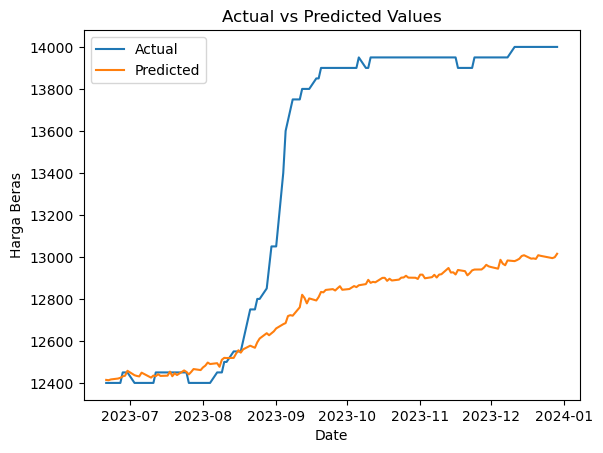

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(test_data.index, test_data['Harga Beras'], label='Actual')

# Plot the predicted values
plt.plot(test_data.index, forecast, label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()

plt.show()

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


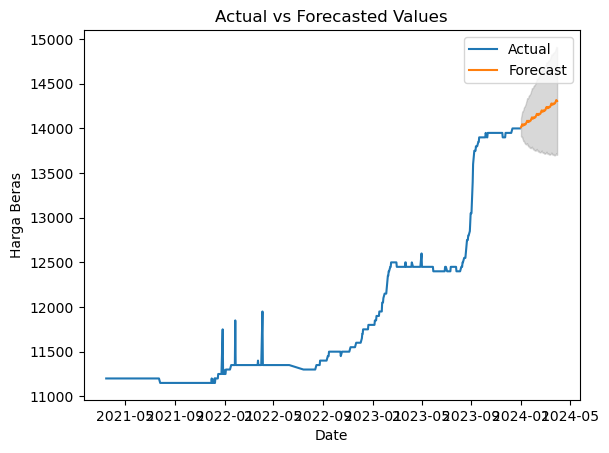

MSE: 4223.6907747276255
RMSE: 64.98992825605846
MAE: 23.025121067243585


In [ ]:
# Fit the model on the entire data
model_fit = model.fit(disp=False)

# Make forecast for the next 90 days
# Assume that the future values of the exogenous variables will be the same as their most recent values
exog_future = pd.DataFrame([dataset.drop('Harga Beras', axis=1).iloc[-1]] * 90)

forecast_results = model_fit.get_forecast(steps=90, exog=exog_future)

# Get the forecast and the confidence interval
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Plot the actual values
plt.plot(dataset.index, dataset['Harga Beras'], label='Actual')

# Plot the forecasted values
forecast_index = pd.date_range(start='2024-01-01', end='2024-03-30', freq='D')  # Create a date range for the forecast
plt.plot(forecast_index, forecast, label='Forecast')

# Plot the confidence interval
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='grey', alpha=0.3)

plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()

plt.show()

# Get the first and last date in the dataset
start_date = dataset.index.min()
end_date = dataset.index.max()

# Get the in-sample prediction and the confidence interval
in_sample_preds = model_fit.get_prediction(start=start_date, end=end_date, dynamic=False)
in_sample = in_sample_preds.predicted_mean

# Calculate the errors for the in-sample prediction
mse = mean_squared_error(dataset['Harga Beras'], in_sample)
rmse = np.sqrt(mse)
mae = mean_absolute_error(dataset['Harga Beras'], in_sample)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming dataset is your DataFrame and it has been preprocessed

# Split the data into training and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, shuffle=False)

# Define the model
model = SARIMAX(train_data['Harga Beras'], 
                order=(1, 1, 1), 
                seasonal_order=(0, 1, 1, 12), 
                exog=train_data.drop('Harga Beras', axis=1))

# Fit the model
model_fit = model.fit(disp=False)

# Make prediction for the next 11 steps
exog_future = dataset.drop('Harga Beras', axis=1)  # Get last 11 rows of exogenous data
forecast = model_fit.predict(len(dataset), len(dataset) -1, exog=exog_future)

print(forecast)

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ValueError: Prediction must have `end` after `start`.

In [ ]:
print(train_data.shape, test_data.shape)

(542, 10) (136, 10)
